# Project 3 Regression

## Data Understanding: 
### Since we are using regression to accurately predict the price of a home, its important to look at all features present in the dataset. A few features that may influence our target values include Kitchen Quality, Year Built, Neighborhood, LotArea, and Bedroom. There are a many other features, but these prove to be a good indicator of a houses value in real life. 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from math import sqrt 

In [6]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)


In [7]:
df = df.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'MasVnrType', 'FireplaceQu'])
## Drop these values because of the high amount of nulls.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### When looking at just the head of the dataset, we can see that the highest SalePrice was 250000. In order to get a quick understaning of the data we're be working with, it may be best to look for possible correlations. From a quick eyetest, some things that stand out to me are the LotArea, Year Sold, Sale Condition, Year Built, etc. Just from looking at the dataframe we can gain insight on what may influence our dependent variable the most.

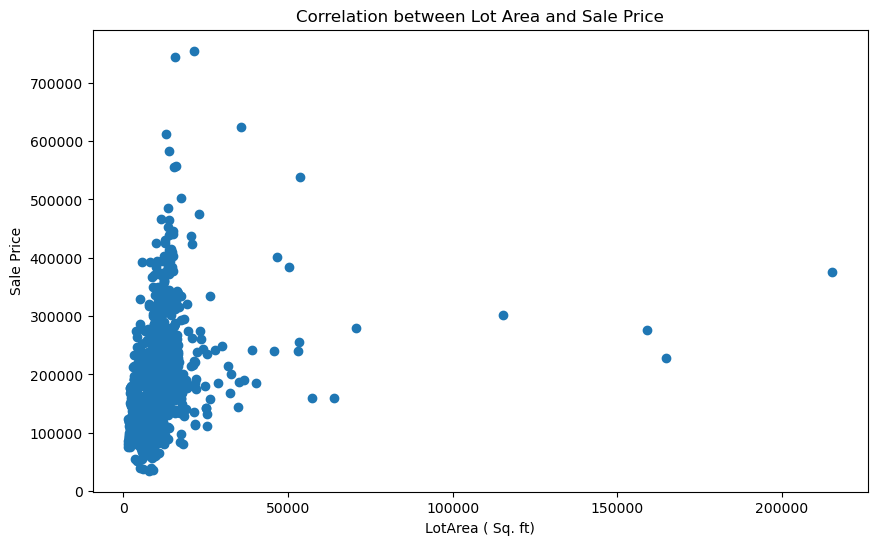

In [8]:
plt.figure(figsize=(10,6)) 

plt.scatter(df['LotArea'], df['SalePrice'])

# Customize labels and title
plt.xlabel('LotArea ( Sq. ft)')
plt.ylabel('Sale Price')
plt.title('Correlation between Lot Area and Sale Price')

# Display the plot
plt.show()

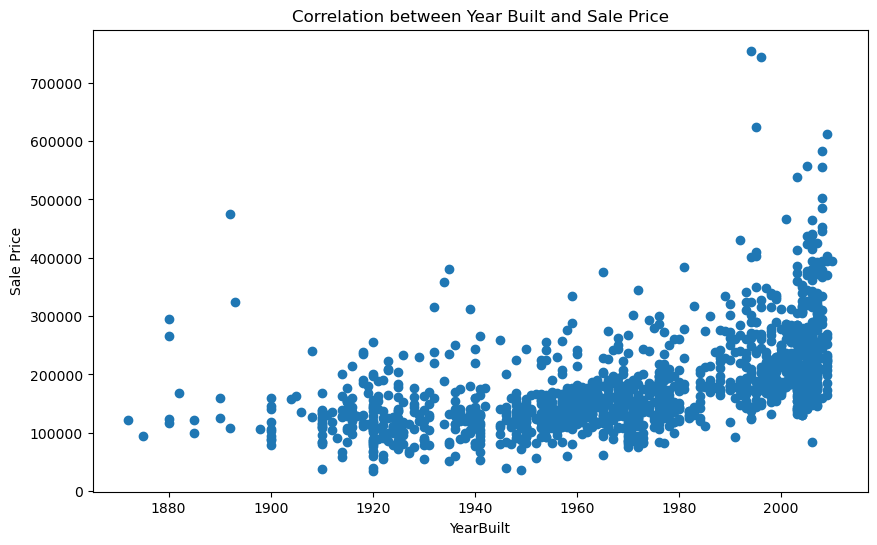

In [115]:
plt.figure(figsize=(10,6)) 

plt.scatter(df['YearBuilt'], df['SalePrice'])

# Customize labels and title
plt.xlabel('YearBuilt')
plt.ylabel('Sale Price')
plt.title('Correlation between Year Built and Sale Price')

# Display the plot
plt.show()

## Simple Linear Regression

### Simple linear regressioon is a powerful, yet simple for of regression that uses one independent variable and a straight line relationship in order to predict a target value. From basic knowledge of housing prices, you may assume that Lotarea has a large correlation, however it seems that the scatterplot isn't as linear as assumed. For this reason, I'm using Year Built as my independent variable for simple linear regression as it seems to have a more linear relationship. 

## Experiment 1

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X = df[['YearBuilt']]
y = df['SalePrice']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 

LinearRegression()

In [15]:
predictions = lr_model.predict(X_test) 

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 5447834477.467489
R-squared: 0.28975191793500943


## Insight

### From these numbers, we can see that the mean squared error is extremly high and the R-squared is .29. The high mean squared error shows that this model is not doing very well predicting the prices of housing. While the r-squared shows that 29% of  the variation in 'sales price' is based on 'year built. This leaves 71% of the variation up to our other features along with other factors. R-squared is more of a feature that is up for interpretation as being a good score as datasets may have a long list of features that influence them. With a target like salesprice however, that includes a variety of feature it seems to be a somewhat decent score. 

### In the future experiments, I intend to cut out the uneccesary features from before in order to reduce noise. I also intend to use other regression techniques to create more accurate models. As learned from experiment 1, I may have to increase my understanding of this dataset in order to more accurately gaion insight. 

# Experiment 2

### In my first experiment, my greatest weaknest was my data not being properly preprocessed. For my second experiment I plan to extensively remove values from my data frame and explore the values that correlate the most.

In [ ]:
## Categorical data such as Street, LotShape, and LandSlope are more useful to us as numerical data. 

In [17]:
df_encoded = pd.get_dummies(df, columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])
correlation_matrix = df_encoded.corr()


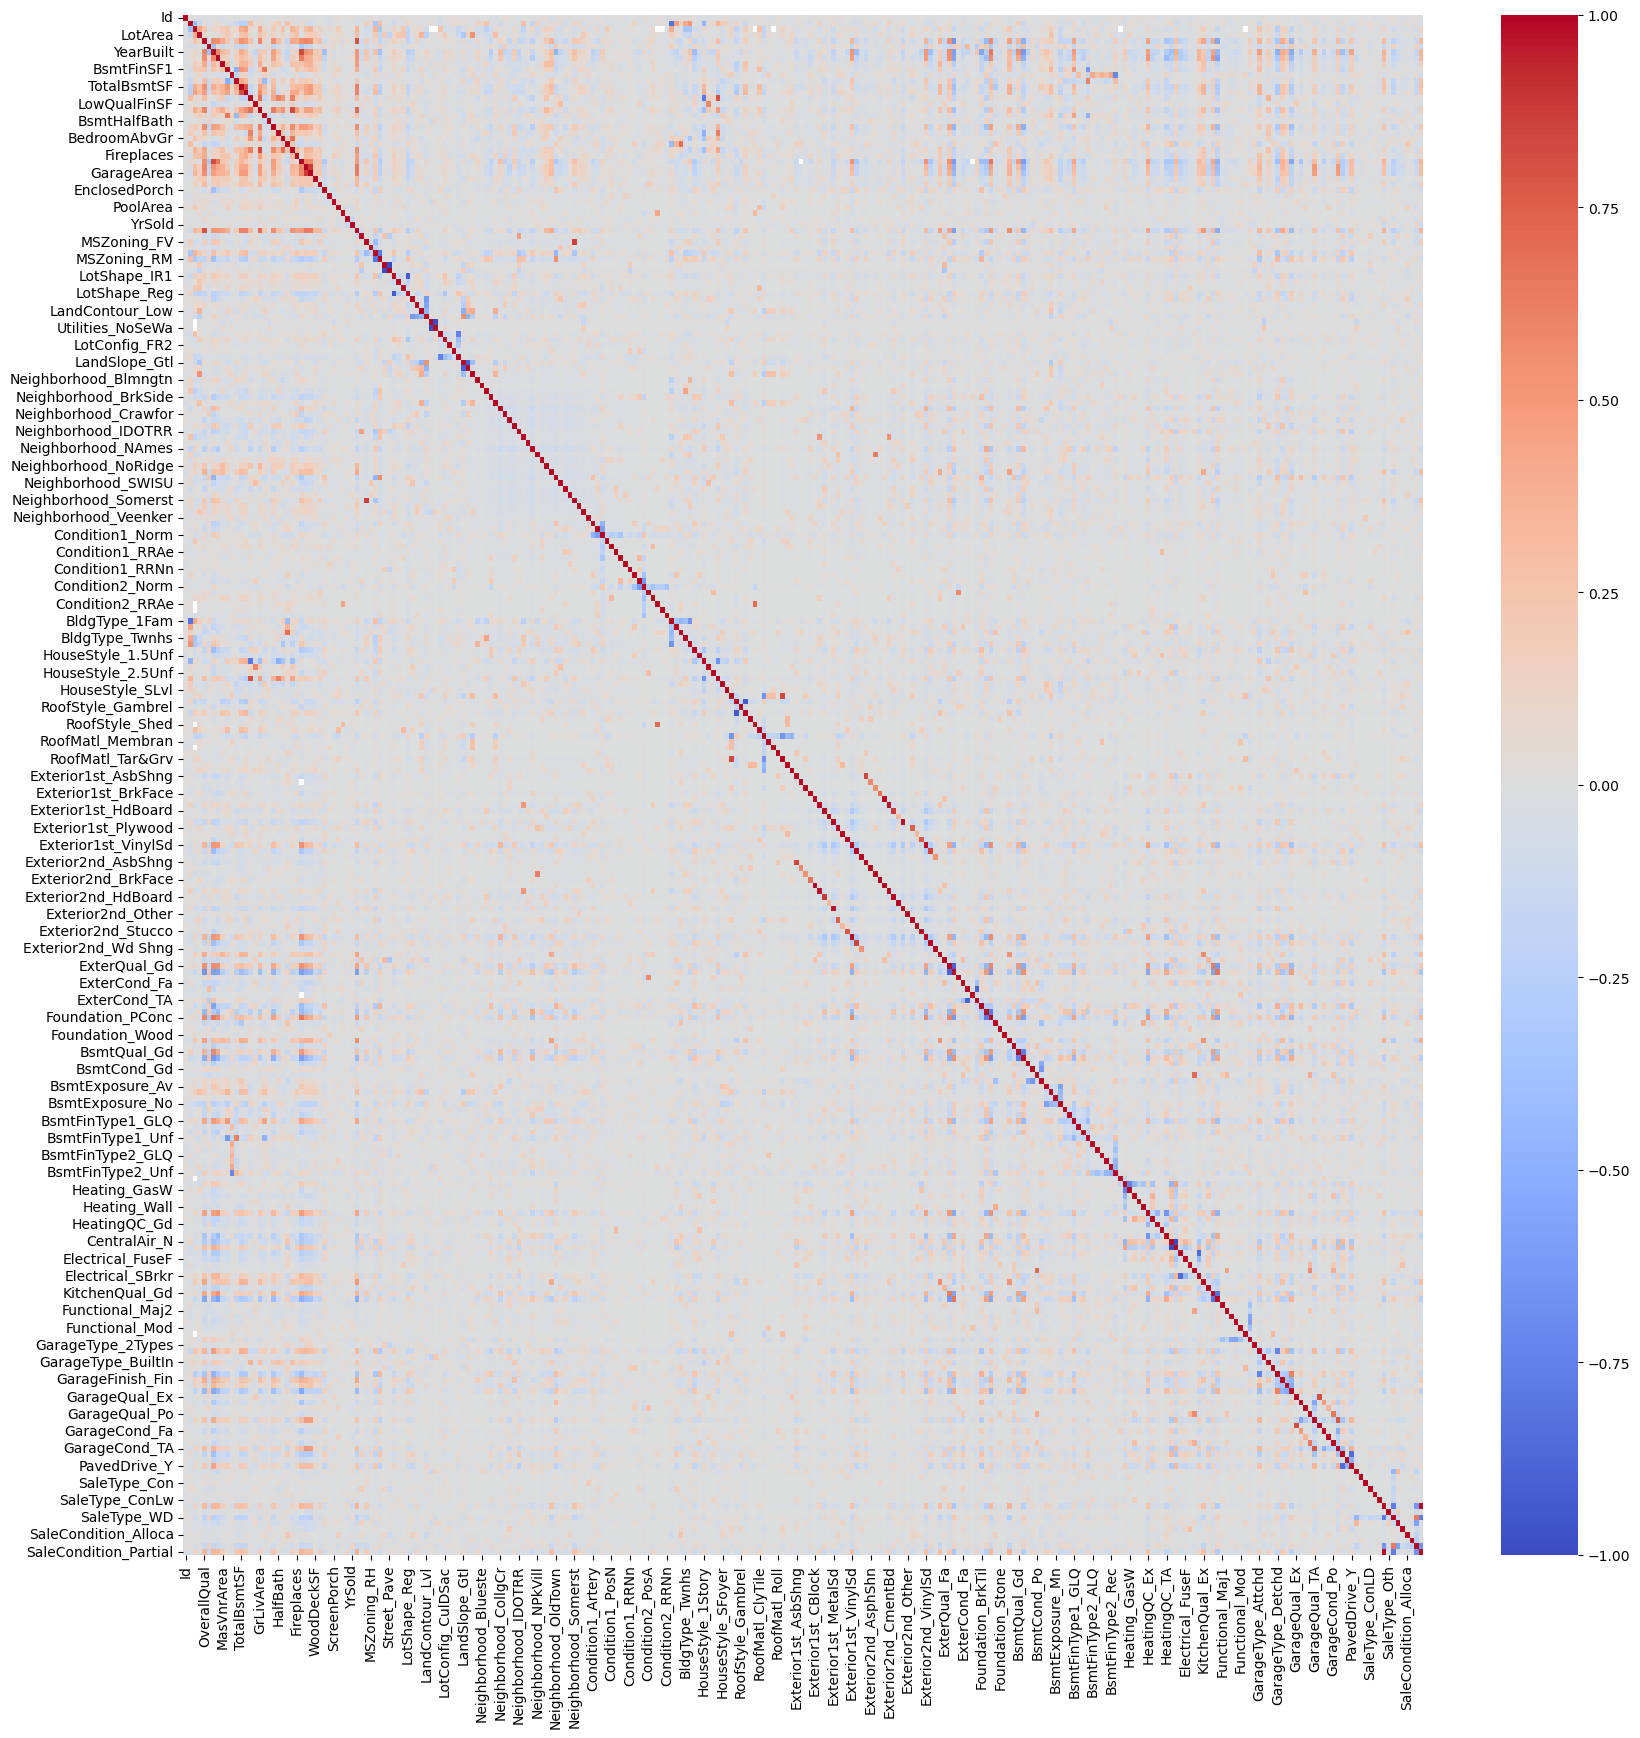

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
### This heatmap is difficult to interpret due to the amount of features. 

In [19]:
# Set the threshold
threshold = 0.8

# Find and print highly correlated pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): 
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            corr_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((col_pair, corr_value))
            print(f"{col_pair}: {corr_value}")
            
print('''Because of the sheer amount of features present, rational methods should be applied in 
order to reduce unnecessary noise for our model. 
The tyical threshold for pairs is .8 to indicate a strong postive or negative correlation.
These pairs listed are highly correlated meaning their convey similar information. This means that leaving one 
feature from the pair wont take much information away.''')


('MSSubClass', 'BldgType_1Fam'): -0.8174605009618733
('YearBuilt', 'GarageYrBlt'): 0.8256674841743404
('TotalBsmtSF', '1stFlrSF'): 0.8195299750050339
('2ndFlrSF', 'HouseStyle_2Story'): 0.8091497798648831
('GrLivArea', 'TotRmsAbvGrd'): 0.8254893743088424
('GarageCars', 'GarageArea'): 0.8824754142814619
('MSZoning_FV', 'Neighborhood_Somerst'): 0.8628071099772279
('MSZoning_RL', 'MSZoning_RM'): -0.8085853546363103
('Street_Grvl', 'Street_Pave'): -1.0000000000000002
('LotShape_IR1', 'LotShape_Reg'): -0.9259589789196634
('Utilities_AllPub', 'Utilities_NoSeWa'): -1.0
('LandSlope_Gtl', 'LandSlope_Mod'): -0.908607452636648
('RoofStyle_Flat', 'RoofMatl_Tar&Grv'): 0.8349139241479901
('RoofStyle_Gable', 'RoofStyle_Hip'): -0.9334615823692307
('Exterior1st_AsbShng', 'Exterior2nd_AsbShng'): 0.8479166666666662
('Exterior1st_CBlock', 'Exterior2nd_CBlock'): 1.0
('Exterior1st_CemntBd', 'Exterior2nd_CmentBd'): 0.9741710841939724
('Exterior1st_HdBoard', 'Exterior2nd_HdBoard'): 0.8832713970304709
('Exterio

In [20]:
columns_to_drop =['BldgType_1Fam', 'GarageYrBlt', 'TotalBsmtSF', 
'HouseStyle_2Story', 'TotRmsAbvGrd',  
'GarageArea', 'MSZoning_FV', 'MSZoning_RM', 'Street_Pave', 
'LotShape_IR1', 'Utilities_NoSeWa', 'LandSlope_Gtl', 
'RoofMatl_Tar&Grv', 'RoofStyle_Hip', 'Exterior1st_AsbShng', 'Exterior1st_CemntBd', 
        'Exterior2nd_HdBoard', 'Exterior2nd_VinylSd', 'Exterior1st_MetalSd', 'ExterQual_Gd', 
                      'ExterCond_TA', 'CentralAir_N', 'Electrical_SBrkr', 'KitchenQual_TA', 
                      'GarageQual_Ex', 'PavedDrive_Y', 'SaleCondition_Partial']
df_reduced = df_encoded.drop(columns=columns_to_drop)
correlation_matrix = df_reduced.corr()
''' The method of determining which values to remove is less straightforward. 
I judged the removal of correlating features by prioritizing features with names 
that seemed to correlate more with 
SalePrice'''

' The method of determining which values to remove is less straightforward. \nI judged the removal of correlating features by prioritizing features with names \nthat seemed to correlate more with \nSalePrice'

In [21]:
sales_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(sales_corr)

SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
1stFlrSF             0.605852
                       ...   
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
GarageFinish_Unf    -0.410608
BsmtQual_TA         -0.452394
ExterQual_TA        -0.589044
Name: SalePrice, Length: 241, dtype: float64


In [22]:
''' We can now see that the features OverallQual, GrLivArea, GarageCars, 
and 1stFlrSF have the highest correleation to SalePrice'''

' We can now see that the features OverallQual, GrLivArea, GarageCars, \nand 1stFlrSF have the highest correleation to SalePrice'

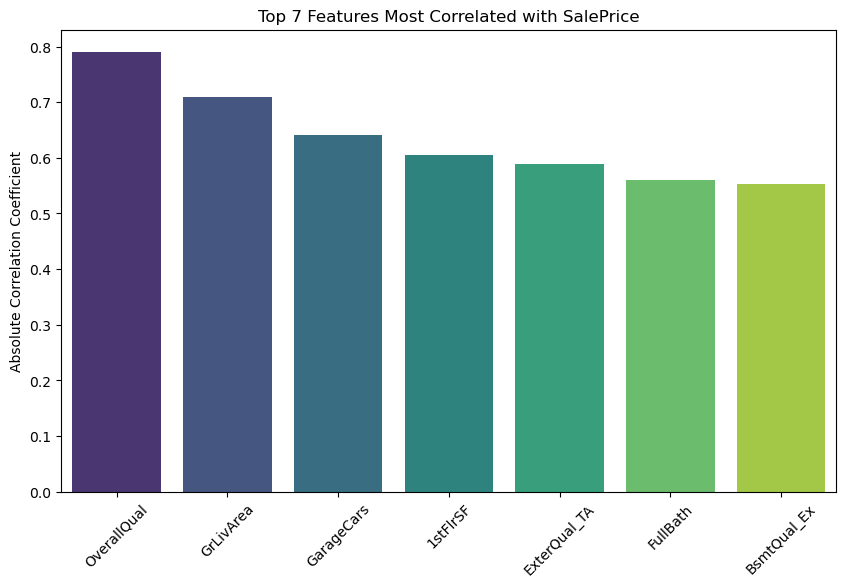

In [43]:
sales_corr = correlation_matrix['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False)
N = 7
top_n_sales_corr = sales_corr.head(N)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_sales_corr.index, y=top_n_sales_corr.values, palette="viridis")
plt.xticks(rotation=45)  # Rotate labels to make them more readable
plt.title(f'Top {N} Features Most Correlated with SalePrice')
plt.ylabel('Absolute Correlation Coefficient')
plt.show()

In [44]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'BsmtQual_Ex']
X = df_reduced[features]  
y = df_reduced['SalePrice']
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train, y_train)
y_pred = lr_model_2.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (MSE): {sqrt(mse)}")

print(f"R-squared (R2 ): {r2_score(y_test, y_pred)}")

Root Mean Squared Error (MSE): 38447.48496196717
R-squared (R2 ): 0.807282107700243


### I kept my number of features present in my mulitple linear regression as 7. I felt this number was high enough to represent the most correlating features while also staying below the number of features that may lead to overfitting. 

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
regressor = DecisionTreeRegressor(random_state=42)

In [40]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_pred = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
mse_dt = sqrt(mse_dt)
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R-squared (R2): {r2_dt}")

Mean Squared Error (MSE): 38866.191481764516
R-squared (R2): 0.8030617213017923


### Both models seem to have a R-squared Values of around  .80 and a MSE value of 38866. The R-squared value seems to be promising, however it's important to know that these don't tell the full story of our models. Considering possibilities such as overfiting are always important to make note of.

### Resources: https://www.investopedia.com/terms/r/regression.asp